In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind
!pip install opencv-python


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ind is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import json

In [ ]:
img = cv2.imread('ktp2.png')

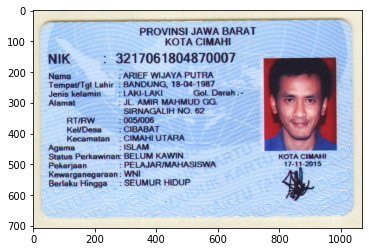

In [ ]:
real_pic = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(real_pic)

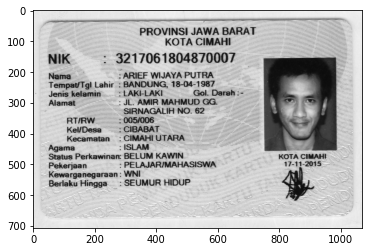

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
result = pytesseract.image_to_string((threshed), lang='ind')
result

'PROVINSI JAWA BARAT\n\n \n\nKOTA CIMAHI\nNIK : 3217061804870007\nNama 1 ARIEF WIJAYA PUTRA\nTempat/Tgi Lahir : BANDUNG, 18-04-1987\nJenis kelamin : LAKI-LAKI Gol. Darah :-\nAlamat : JL. AMIR MAHMUD GG.\nSIRNAGALIH NO. 62\n\nRT/RW 1005/2006\n\nKel/Desa : CIBABAT\n\nKecamatan : CIMAHI UTARA\nAgama : ISLAM\nStatus Perkawinan: BELUM KAWIN KOTA CIMAHI\nPekerjaan : PELAJAR/MAHASISWA 17-11-2015\nKewarganegaraan : WNI\n\nBerlaku Hingga\n\n: SEUMUR HIDUP\n\x0c'

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

PROVINSI JAWA BARAT

 

KOTA CIMAHI
NIK : 3217061804870007
Nama : ARIEF WIJAYA PUTRA
Tempat/Tgl Lahir : BANDUNG, 18-04-1987
Jenis kelamin : LAKI-LAKI Gol. Darah :-
Alamat : JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62

RT/RW : 0005/0006

Kel/Desa : CIBABAT

Kecamatan : CIMAHI UTARA
Agama : ISLAM
Status Perkawinan: BELUM KAWIN KOTA CIMAHI
Pekerjaan : PELAJAR/MAHASISWA 17-11-2015
Kewarganegaraan : WNI

Berlaku Hingga

: SEUMUR HIDUP



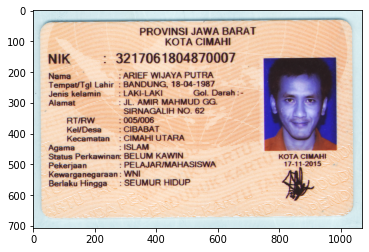

In [ ]:
img = cv2.imread('ktp2.png')
plt.imshow(img)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
for text2 in text2.split("\n"):
  if "—" in text2:
    text2 = text2.replace("—", ":")
  if "Nama 1" in text2:
    text2 = text2.replace("Nama 1", "Nama :")
  if "Tempat/Tgi Lahir" in text2:
    text2 = text2.replace("Tempat/Tgi Lahir", "Tempat/Tgl Lahir")
  if "RT/RW" in text2:
    text2 = text2.replace("RT/RW", "RT/RW :")
    if "1" in text2:
      text2 = text2.replace("1", "0")
    if "2" in text2:
      text2 = text2.replace("2", "0")

      
  #normalisasi
  if "NIK" in text2:
    nik_char = text2.split()
    if "D" in text2:
      text2 = text2.replace("D", "0")
    if "?" in text2:
      text2 = text2.replace("?", "7")

  print(text2)
  data_extract = json.dumps(text2)
  text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()
  


In [ ]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [ ]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0   1070   
1       2         1          1        0         0         0   347   38    376   
2       3         1          1        1         0         0   347   38    376   
3       4         1          1        1         1         0   347   38    376   
4       5         1          1        1         1         1   347   57    154   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
92      3         1          5        1         0         0   282  548    228   
93      4         1          5        1         1         0   282  548    228   
94      5         1          5        1         1         1   282  558      4   
95      5         1          5        1         1         2   297  550    116   
96      5         1          5        1         1         3   426  548     84   

    height  conf 

In [ ]:
from pytesseract import Output

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

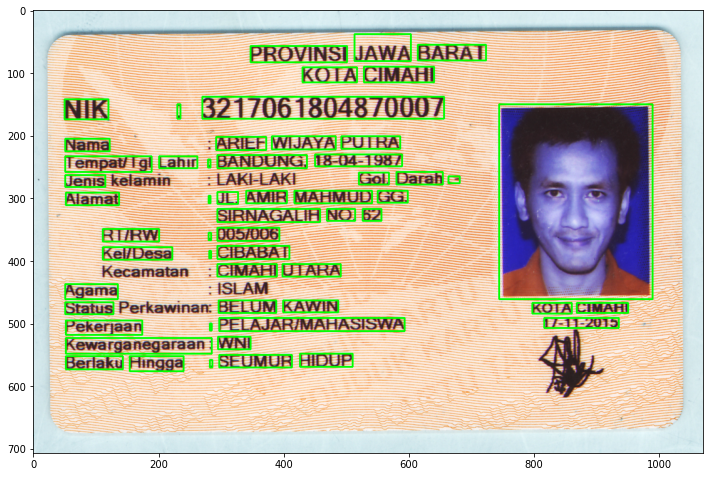

In [ ]:
display(img)